In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import os
import json
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
cell_y_coord=0
cell_x_coord=0

In [3]:
birch_dir='/data/workflows/BONA-birch/output/'
black_spruce_dir='/data/workflows/BONA-black-spruce/output/'

gpp_tr='GPP_monthly_tr.nc'
gpp_sc='GPP_monthly_sc.nc'

npp_tr='NPP_monthly_tr.nc'
npp_sc='NPP_monthly_sc.nc'

rm_tr='RM_monthly_tr.nc'
rm_sc='RM_monthly_sc.nc'

rg_tr='RG_monthly_tr.nc'
rg_sc='RG_monthly_sc.nc'

rh_tr='RH_monthly_tr.nc'
rh_sc='RH_monthly_sc.nc'

ald_eq='ALD_yearly_eq.nc'
ald_tr='ALD_yearly_tr.nc'
ald_sc='ALD_yearly_sc.nc'

lwclayer_tr = 'LWCLAYER_monthly_tr.nc'
lwclayer_sc = 'LWCLAYER_monthly_sc.nc'

tlayer_tr = 'TLAYER_monthly_tr.nc'
tlayer_sc = 'TLAYER_monthly_sc.nc'

vegc_tr = 'VEGC_monthly_tr.nc'
vegc_sc = 'VEGC_monthly_sc.nc'
vegc_eq = 'VEGC_monthly_eq.nc'

lai_tr = 'LAI_monthly_tr.nc'

transpiration_tr = 'TRANSPIRATION_monthly_tr.nc'
eet_tr = 'EET_monthly_tr.nc'

ltrfalc_tr = 'LTRFALC_monthly_tr.nc'
shlwc_tr = 'SHLWC_monthly_tr.nc'
shlwc_eq = 'SHLWC_monthly_eq.nc'
deepc_eq = 'DEEPC_yearly_eq.nc'
minec_eq= 'MINEC_yearly_eq.nc'

burnveg_tr = 'BURNVEG2AIRC_monthly_tr.nc'

In [4]:
#GPP
gpp_bs_tr = xr.open_dataset(black_spruce_dir+gpp_tr)
tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()
gpp_bs_tr = gpp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_bs_tr = gpp_bs_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

#Burn
burn_bs_tr = xr.open_dataset(black_spruce_dir+burnveg_tr)
burn_bs_tr = burn_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
burn_bs_tr = burn_bs_tr.variables['BURNVEG2AIRC'][:, cell_y_coord, cell_x_coord]

#gpp_bs_sc = xr.open_dataset(black_spruce_dir+gpp_sc)
#sc_dates = gpp_bs_sc.indexes['time'].to_datetimeindex()
#gpp_bs_sc = gpp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#gpp_bs_sc = gpp_bs_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_bs_tr = xr.open_dataset(black_spruce_dir+npp_tr)
npp_bs_tr = npp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_bs_tr = npp_bs_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

#npp_bs_sc = xr.open_dataset(black_spruce_dir+npp_sc)
#npp_bs_sc = npp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#npp_bs_sc = npp_bs_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#ALD
ald_bs_tr = xr.open_dataset(black_spruce_dir+ald_tr)
ald_bs_tr = ald_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
ald_bs_tr = ald_bs_tr.variables['ALD'][:, cell_y_coord, cell_x_coord]

#ald_bs_sc = xr.open_dataset(black_spruce_dir+ald_sc)
#ald_bs_sc = ald_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#ald_bs_sc = ald_bs_sc.variables['ALD'][:, cell_y_coord, cell_x_coord]

#RM
rm_bs_tr = xr.open_dataset(black_spruce_dir+rm_tr)
rm_bs_tr = rm_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_bs_tr = rm_bs_tr.variables['RM'][:, :, :5, cell_y_coord, cell_x_coord]

#rm_bs_sc = xr.open_dataset(black_spruce_dir+rm_sc)
#rm_bs_sc = rm_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rm_bs_sc = rm_bs_sc.variables['RM'][:, :, :5, cell_y_coord, cell_x_coord]

#RG
rg_bs_tr = xr.open_dataset(black_spruce_dir+rg_tr)
rg_bs_tr = rg_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_bs_tr = rg_bs_tr.variables['RG'][:, :, :5, cell_y_coord, cell_x_coord]

#rg_bs_sc = xr.open_dataset(black_spruce_dir+rg_sc)
#rg_bs_sc = rg_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rg_bs_sc = rg_bs_sc.variables['RG'][:, :, :5, cell_y_coord, cell_x_coord]

#RH
rh_bs_tr_layer = xr.open_dataset(black_spruce_dir+rh_tr)
rh_bs_tr_layer = rh_bs_tr_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_bs_tr_layer = rh_bs_tr_layer.variables['RH'][:, :, cell_y_coord, cell_x_coord]
rh_bs_tr = rh_bs_tr_layer.sum(axis=1)

#rh_bs_sc_layer = xr.open_dataset(black_spruce_dir+rh_sc)
#rh_bs_sc_layer = rh_bs_sc_layer.convert_calendar('standard', use_cftime=True, align_on='date')
#rh_bs_sc_layer = rh_bs_sc_layer.variables['RH'][:, :, cell_y_coord, cell_x_coord]
#rh_bs_sc = rh_bs_sc_layer.sum(axis=1)

#LWCLAYER
lwclayer_bs_tr = xr.open_dataset(black_spruce_dir+lwclayer_tr)
lwclayer_bs_tr = lwclayer_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_bs_tr = lwclayer_bs_tr.variables['LWCLAYER'][:,:, cell_y_coord, cell_x_coord]

#lwclayer_bs_sc = xr.open_dataset(black_spruce_dir+lwclayer_sc)
#lwclayer_bs_sc = lwclayer_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#lwclayer_bs_sc = lwclayer_bs_sc.variables['LWCLAYER'][:,:, cell_y_coord, cell_x_coord]

#TLAYER
tlayer_bs_tr = xr.open_dataset(black_spruce_dir+tlayer_tr)
tlayer_bs_tr = tlayer_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_bs_tr = tlayer_bs_tr.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#tlayer_bs_sc = xr.open_dataset(black_spruce_dir+tlayer_sc)
#tlayer_bs_sc = tlayer_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#tlayer_bs_sc = tlayer_bs_sc.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#VEGC
vegc_bs_eq = xr.open_dataset(black_spruce_dir+vegc_eq)
vegc_bs_eq = vegc_bs_eq.to_dataframe().reset_index()
vegc_bs_eq = vegc_bs_eq.loc[(vegc_bs_eq['y']==cell_y_coord) & (vegc_bs_eq['x']==cell_x_coord) & (vegc_bs_eq['pft']<5)]

vegc_bs_tr = xr.open_dataset(black_spruce_dir+vegc_tr)
vegc_bs_tr = vegc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
vegc_bs_tr = vegc_bs_tr.to_dataframe().reset_index()
vegc_bs_tr = vegc_bs_tr.loc[(vegc_bs_tr['y']==cell_y_coord) & (vegc_bs_tr['x']==cell_x_coord) & (vegc_bs_tr['pft']<5)]

#LAI
lai_bs_tr = xr.open_dataset(black_spruce_dir+lai_tr)
lai_bs_tr = lai_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lai_bs_tr = lai_bs_tr.variables['LAI'][:, :5, cell_y_coord, cell_x_coord]
lai_bs_tr_sum = lai_bs_tr.sum(axis=1)

#TRANSPIRATION
transpiration_bs_tr = xr.open_dataset(black_spruce_dir+transpiration_tr)
transpiration_bs_tr = transpiration_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
transpiration_bs_tr = transpiration_bs_tr.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#EET
eet_bs_tr = xr.open_dataset(black_spruce_dir+eet_tr)
eet_bs_tr = eet_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
eet_bs_tr = eet_bs_tr.variables['EET'][:, cell_y_coord, cell_x_coord]

#LTRFALC
ltrfalc_bs_tr = xr.open_dataset(black_spruce_dir+ltrfalc_tr)
ltrfalc_bs_tr = ltrfalc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
ltrfalc_bs_tr = ltrfalc_bs_tr.to_dataframe().reset_index()
ltrfalc_bs_tr = ltrfalc_bs_tr.loc[(ltrfalc_bs_tr['y']==cell_y_coord) & (ltrfalc_bs_tr['x']==cell_x_coord)]

#SHLWC
shlwc_bs_tr = xr.open_dataset(black_spruce_dir+shlwc_tr)
shlwc_bs_tr = shlwc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
shlwc_bs_tr = shlwc_bs_tr.to_dataframe().reset_index()
shlwc_bs_tr = shlwc_bs_tr.loc[(shlwc_bs_tr['y']==cell_y_coord) & (shlwc_bs_tr['x']==cell_x_coord)]

shlwc_bs_eq = xr.open_dataset(black_spruce_dir+shlwc_eq)
shlwc_bs_eq = shlwc_bs_eq.to_dataframe().reset_index()
shlwc_bs_eq = shlwc_bs_eq.loc[(shlwc_bs_eq['y']==cell_y_coord) & (shlwc_bs_eq['x']==cell_x_coord)]

#DEEPC
deepc_bs_eq = xr.open_dataset(black_spruce_dir+deepc_eq)
deepc_bs_eq = deepc_bs_eq.to_dataframe().reset_index()
deepc_bs_eq = deepc_bs_eq.loc[(deepc_bs_eq['y']==cell_y_coord) & (deepc_bs_eq['x']==cell_x_coord)]

#MINEC
minec_bs_eq = xr.open_dataset(black_spruce_dir+minec_eq)
minec_bs_eq = minec_bs_eq.to_dataframe().reset_index()
minec_bs_eq = minec_bs_eq.loc[(minec_bs_eq['y']==cell_y_coord) & (minec_bs_eq['x']==cell_x_coord)]

#ALD
ald_bs_eq = xr.open_dataset(black_spruce_dir+ald_eq)
ald_bs_eq = ald_bs_eq.to_dataframe().reset_index()
ald_bs_eq = ald_bs_eq.loc[(ald_bs_eq['y']==cell_y_coord) & (ald_bs_eq['x']==cell_x_coord)]

/tmp/ipykernel_1794/4137659836.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()


In [5]:
rm_bs_tr_root = rm_bs_tr[:, 2, :].sum(axis=1)
rm_bs_tr = rm_bs_tr.sum(axis=2).sum(axis=1)

#rm_bs_sc_root = rm_bs_sc[:, 2, :].sum(axis=1)
#rm_bs_sc = rm_bs_sc.sum(axis=2).sum(axis=1)

rg_bs_tr_root = rg_bs_tr[:, 2, :].sum(axis=1)
rg_bs_tr = rg_bs_tr.sum(axis=2).sum(axis=1)

#rg_bs_sc_root = rg_bs_sc[:, 2, :].sum(axis=1)
#rg_bs_sc = rg_bs_sc.sum(axis=2).sum(axis=1)

In [6]:
rh_bs_tr

<xarray.Variable (time: 1464)>
array([  0.37867948,   0.34706759,   0.36557766, ..., 102.90679881,
         0.52728764,   0.3527083 ])

In [7]:
df_bs_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_bs_tr, 'NPP': npp_bs_tr, 'RG': rg_bs_tr, 'RG_root': rg_bs_tr_root, 'RH': rh_bs_tr, 'RM': rm_bs_tr, 'RM_root': rm_bs_tr_root, 'LWC_top': lwclayer_bs_tr[:,1], 'TLAYER_top': tlayer_bs_tr[:,1], 'EET': eet_bs_tr, 'TRANSPIRATION': transpiration_bs_tr, 'LAI': lai_bs_tr_sum, 'BURN': burn_bs_tr})
#df_bs_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_bs_sc, 'NPP': npp_bs_sc, 'RG': rg_bs_sc, 'RH': rh_bs_sc, 'RM': rm_bs_sc, 'LWC_top': lwclayer_bs_sc, 'TLAYER_top': tlayer_bs_sc})
df_bs = pd.concat([df_bs_tr])
df_bs['RECO'] = df_bs['RG'] + df_bs['RM'] + df_bs['RH']
df_bs['NEE'] = df_bs['RECO'] - df_bs['GPP']
df_bs['year'] = df_bs['date'].dt.year
df_bs_yearly = df_bs.groupby(by=['year']).sum()

In [8]:
cell_y_coord=0
cell_x_coord=0

In [9]:
#GPP
gpp_br_tr = xr.open_dataset(birch_dir+gpp_tr)
tr_dates = gpp_br_tr.indexes['time'].to_datetimeindex()
gpp_br_tr = gpp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_br_tr = gpp_br_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

#Burn
burn_br_tr = xr.open_dataset(birch_dir+burnveg_tr)
burn_br_tr = burn_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
burn_br_tr = burn_br_tr.variables['BURNVEG2AIRC'][:, cell_y_coord, cell_x_coord]

#gpp_br_sc = xr.open_dataset(birch_dir+gpp_sc)
#sc_dates = gpp_br_sc.indexes['time'].to_datetimeindex()
#gpp_br_sc = gpp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#gpp_br_sc = gpp_br_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_br_tr = xr.open_dataset(birch_dir+npp_tr)
npp_br_tr = npp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_br_tr = npp_br_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

#npp_br_sc = xr.open_dataset(birch_dir+npp_sc)
#npp_br_sc = npp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#npp_br_sc = npp_br_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#ALD
ald_br_tr = xr.open_dataset(birch_dir+ald_tr)
ald_br_tr = ald_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
ald_br_tr = ald_br_tr.variables['ALD'][:, cell_y_coord, cell_x_coord]

#ald_br_sc = xr.open_dataset(birch_dir+ald_sc)
#ald_br_sc = ald_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#ald_br_sc = ald_br_sc.variables['ALD'][:, cell_y_coord, cell_x_coord]

#RM
rm_br_tr = xr.open_dataset(birch_dir+rm_tr)
rm_br_tr = rm_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_br_tr = rm_br_tr.variables['RM'][:, :, :, cell_y_coord, cell_x_coord]

#rm_br_sc = xr.open_dataset(birch_dir+rm_sc)
#rm_br_sc = rm_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rm_br_sc = rm_br_sc.variables['RM'][:, :, :, cell_y_coord, cell_x_coord]

#RG
rg_br_tr = xr.open_dataset(birch_dir+rg_tr)
rg_br_tr = rg_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_br_tr = rg_br_tr.variables['RG'][:, :, :, cell_y_coord, cell_x_coord]

#rg_br_sc = xr.open_dataset(birch_dir+rg_sc)
#rg_br_sc = rg_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rg_br_sc = rg_br_sc.variables['RG'][:, :, :, cell_y_coord, cell_x_coord]

#RH
rh_br_tr_layer = xr.open_dataset(birch_dir+rh_tr)
rh_br_tr_layer = rh_br_tr_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_br_tr_layer = rh_br_tr_layer.variables['RH'][:,:,cell_y_coord, cell_x_coord]
rh_br_tr = rh_br_tr_layer.sum(axis=1)

#rh_br_sc_layer = xr.open_dataset(birch_dir+rh_sc)
#rh_br_sc_layer = rh_br_sc_layer.convert_calendar('standard', use_cftime=True, align_on='date')
#rh_br_sc_layer = rh_br_sc_layer.variables['RH'][:,:,cell_y_coord, cell_x_coord]
#rh_br_sc = rh_br_sc_layer.sum(axis=1)

#LWCLAYER
lwclayer_br_tr = xr.open_dataset(birch_dir+lwclayer_tr)
lwclayer_br_tr = lwclayer_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_br_tr = lwclayer_br_tr.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord]

#lwclayer_br_sc = xr.open_dataset(birch_dir+lwclayer_sc)
#lwclayer_br_sc = lwclayer_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#lwclayer_br_sc = lwclayer_br_sc.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord]

#TLAYER
tlayer_br_tr = xr.open_dataset(birch_dir+tlayer_tr)
tlayer_br_tr = tlayer_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_br_tr = tlayer_br_tr.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#tlayer_br_sc = xr.open_dataset(birch_dir+tlayer_sc)
#tlayer_br_sc = tlayer_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#tlayer_br_sc = tlayer_br_sc.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#VEGC
vegc_br_eq = xr.open_dataset(birch_dir+vegc_eq)
vegc_br_eq = vegc_br_eq.to_dataframe().reset_index()
vegc_br_eq = vegc_br_eq.loc[(vegc_br_eq['y']==cell_y_coord) & (vegc_br_eq['x']==cell_x_coord) & (vegc_br_eq['pft']<5)]

vegc_br_tr = xr.open_dataset(birch_dir+vegc_tr)
vegc_br_tr = vegc_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
vegc_br_tr = vegc_br_tr.to_dataframe().reset_index()
vegc_br_tr = vegc_br_tr.loc[(vegc_br_tr['y']==cell_y_coord) & (vegc_br_tr['x']==cell_x_coord) & (vegc_br_tr['pft']<5)]

#LAI
lai_br_tr = xr.open_dataset(birch_dir+lai_tr)
lai_br_tr = lai_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lai_br_tr = lai_br_tr.variables['LAI'][:, :5, cell_y_coord, cell_x_coord]
lai_br_tr_sum = lai_br_tr.sum(axis=1)

#TRANSPIRATION
transpiration_br_tr = xr.open_dataset(birch_dir+transpiration_tr)
transpiration_br_tr = transpiration_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
transpiration_br_tr = transpiration_br_tr.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#EET
eet_br_tr = xr.open_dataset(birch_dir+eet_tr)
eet_br_tr = eet_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
eet_br_tr = eet_br_tr.variables['EET'][:, cell_y_coord, cell_x_coord]

#SHLWC
shlwc_br_tr = xr.open_dataset(birch_dir+shlwc_tr)
shlwc_br_tr = shlwc_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
shlwc_br_tr = shlwc_br_tr.to_dataframe().reset_index()
shlwc_br_tr = shlwc_br_tr.loc[(shlwc_br_tr['y']==cell_y_coord) & (shlwc_br_tr['x']==cell_x_coord)]

#SHLWC
shlwc_br_eq = xr.open_dataset(birch_dir+shlwc_eq)
shlwc_br_eq = shlwc_br_eq.to_dataframe().reset_index()
shlwc_br_eq = shlwc_br_eq.loc[(shlwc_br_eq['y']==cell_y_coord) & (shlwc_br_eq['x']==cell_x_coord)]

#DEEPC
deepc_br_eq = xr.open_dataset(birch_dir+deepc_eq)
deepc_br_eq = deepc_br_eq.to_dataframe().reset_index()
deepc_br_eq = deepc_br_eq.loc[(deepc_br_eq['y']==cell_y_coord) & (deepc_br_eq['x']==cell_x_coord)]

#MINEC
minec_br_eq = xr.open_dataset(birch_dir+minec_eq)
minec_br_eq = minec_br_eq.to_dataframe().reset_index()
minec_br_eq = minec_br_eq.loc[(minec_br_eq['y']==cell_y_coord) & (minec_br_eq['x']==cell_x_coord)]

/tmp/ipykernel_1794/3366559731.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_br_tr.indexes['time'].to_datetimeindex()


In [10]:
rm_br_tr_root = rm_br_tr[:, 2, :].sum(axis=1)
rm_br_tr = rm_br_tr.sum(axis=2).sum(axis=1)

#rm_br_sc_root = rm_br_sc[:, 2, :].sum(axis=1)
#rm_br_sc = rm_br_sc.sum(axis=2).sum(axis=1)

rg_br_tr_root = rg_br_tr[:, 2, :].sum(axis=1)
rg_br_tr = rg_br_tr.sum(axis=2).sum(axis=1)

#rg_br_sc_root = rg_br_sc[:, 2, :].sum(axis=1)
#rg_br_sc = rg_br_sc.sum(axis=2).sum(axis=1)

In [11]:
df_br_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_br_tr, 'NPP': npp_br_tr, 'RG': rg_br_tr, 'RG_root': rg_br_tr_root, 'RH': rh_br_tr, 'RM': rm_br_tr, 'RM_root': rm_br_tr_root, 'LWC_top': lwclayer_br_tr[:,1], 'TLAYER_top': tlayer_br_tr[:,1], 'EET': eet_br_tr, 'TRANSPIRATION': transpiration_br_tr, 'LAI': lai_br_tr_sum, 'BURN': burn_br_tr})
#df_br_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_br_sc, 'NPP': npp_br_sc, 'RG': rg_br_sc, 'RH': rh_br_sc, 'RM': rm_br_sc, 'LWC_top': lwclayer_br_sc, 'TLAYER_top': tlayer_br_sc})
df_br = pd.concat([df_br_tr])
df_br['RECO'] = df_br['RG'] + df_br['RM'] + df_br['RH']
df_br['NEE'] = df_br['RECO'] - df_br['GPP']
df_br['year'] = df_br['date'].dt.year
df_br_yearly = df_br.groupby(by=['year']).sum()

In [12]:
df_bs_yearly['CMT'] = 'Black Spruce'
df_br_yearly['CMT'] = 'Deciduous'
df_bs_yearly['ALD'] = ald_bs_tr
df_br_yearly['ALD'] = ald_br_tr

df_yearly=pd.concat([df_bs_yearly, df_br_yearly]).reset_index()

In [13]:
vegc_bs_eq

,time,pftpart,pft,y,x,VEGC
0,0,0,0,0,0,285.702820
1,0,0,1,0,0,172.054947
2,0,0,2,0,0,54.664394
3,0,0,3,0,0,1897.985840
4,0,0,4,0,0,295.486115
...,...,...,...,...,...,...
539990,17999,2,0,0,0,166.079971
539991,17999,2,1,0,0,25.451385
539992,17999,2,2,0,0,17.863094
539993,17999,2,3,0,0,0.000000


In [14]:
vegc_bs_eq.loc[vegc_bs_eq['pft']==0]

,time,pftpart,pft,y,x,VEGC
0,0,0,0,0,0,285.702820
10,0,1,0,0,0,1689.416504
20,0,2,0,0,0,381.483765
30,1,0,0,0,0,284.167511
40,1,1,0,0,0,1684.674438
...,...,...,...,...,...,...
539950,17998,1,0,0,0,1372.593018
539960,17998,2,0,0,0,166.914734
539970,17999,0,0,0,0,460.106079
539980,17999,1,0,0,0,1368.768066


<AxesSubplot:xlabel='time', ylabel='VEGC'>

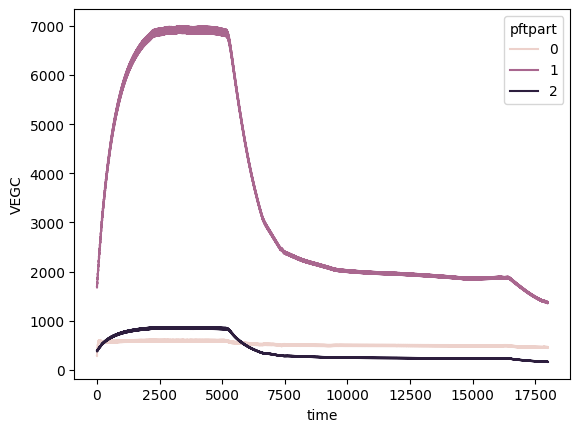

In [15]:
sns.lineplot(data = vegc_bs_eq.loc[vegc_bs_eq['pft']==0], x='time', y='VEGC', hue='pftpart')

## Compare vegetation carbon stocks

In [16]:
vegc_bs_eq_tem = vegc_bs_eq.loc[vegc_bs_eq['time']==11994]
vegc_bs_eq_tem['type'] = 'Modeled (TEM)'

vegc_bs_tr_tem = vegc_bs_tr.loc[vegc_bs_tr['time']==pd.to_datetime('2021-07-31')]
vegc_bs_tr_tem['type'] = 'Modeled (TEM)'

vegc_bs_tr_field = vegc_bs_eq_tem.copy()
vegc_bs_tr_field['type'] = 'Field Obs.'
vegc_bs_tr_field['VEGC'] = [287.19, 173.92, 55.25, 1921.0, 299.33,
                            1694.1, 217.67, 123.0, 0.0, 0.0,
                            383.38, 30.54, 44.56, 0.0, 0.0]

vegc_bs_tr_rs = vegc_bs_eq_tem.copy()
vegc_bs_tr_rs['type'] = 'Remotely Sensed'
vegc_bs_tr_rs['VEGC'] = [337.38, np.nan, np.nan, np.nan, np.nan,
                            1990.0, np.nan, np.nan, np.nan, np.nan,
                            450.44, np.nan, np.nan, np.nan, np.nan]

/tmp/ipykernel_1794/3570484078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_bs_eq_tem['type'] = 'Modeled (TEM)'
/tmp/ipykernel_1794/3570484078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_bs_tr_tem['type'] = 'Modeled (TEM)'


In [17]:
vegc_bs_comp=pd.concat([vegc_bs_tr_tem, vegc_bs_tr_field, vegc_bs_tr_rs]).groupby(by=['pft', 'type']).sum().reset_index()

In [18]:
vegc_br_eq_tem = vegc_br_eq.loc[vegc_br_eq['time']==11995]
vegc_br_eq_tem['type'] = 'Modeled (TEM)'

vegc_br_tr_tem = vegc_br_tr.loc[vegc_br_tr['time']==pd.to_datetime('2021-07-31')]
vegc_br_tr_tem['type'] = 'Modeled (TEM)'

vegc_br_tr_field = vegc_br_eq_tem.copy()
vegc_br_tr_field['type'] = 'Field Obs.'
vegc_br_tr_field['VEGC'] = [1.06,         103.00,       85.13,      158.31,   27.0,
                            5.09,         112.00,       2131.64,     0.0,      123.0,
                            0.43,         28.00,        289.71,     0.0,      20.0]

vegc_br_tr_rs = vegc_br_eq_tem.copy()
vegc_br_tr_rs['type'] = 'Remotely Sensed'
vegc_br_tr_rs['VEGC'] = [np.nan, np.nan, 62.14, np.nan, np.nan,
                            np.nan, np.nan, 2580.17, np.nan, np.nan,
                            np.nan, np.nan, 345.38, np.nan, np.nan]

/tmp/ipykernel_1794/1284057697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_br_eq_tem['type'] = 'Modeled (TEM)'
/tmp/ipykernel_1794/1284057697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_br_tr_tem['type'] = 'Modeled (TEM)'


In [19]:
vegc_br_comp=pd.concat([vegc_br_tr_tem, vegc_br_tr_field, vegc_br_tr_rs]).groupby(by=['pft', 'type']).sum().reset_index()
vegc_br_comp['order'] = [4, 4, 4, 1, 1, 1, 0, 0, 0, 3, 3, 3, 2, 2, 2]
vegc_br_comp = vegc_br_comp.sort_values(by='order')

/tmp/ipykernel_1794/3570603281.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
/tmp/ipykernel_1794/3570603281.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)


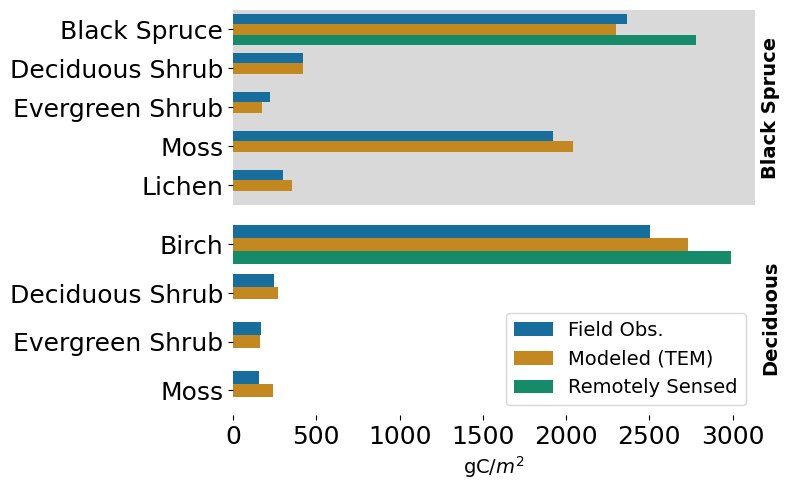

In [20]:
#TODO: propagate Error
fig, axes = plt.subplots(2, 1, figsize = (8,5), sharex=True)
sns.barplot(data = vegc_bs_comp, x='VEGC', y='pft', hue='type', orient='h', ax=axes[0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[0].set_facecolor('#d9d9d9')
axes[0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
axes[0].set_ylabel('Black Spruce', fontweight='bold', fontsize=14)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks_position('none')
axes[0].yaxis.set_label_position('right')
axes[0].get_legend().remove()

#TODO: propagate Error
sns.barplot(data = vegc_br_comp.loc[vegc_br_comp['pft']!=0], x='VEGC', y='order', hue='type', orient='h', ax=axes[1], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[1].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
plt.xticks(fontsize= 18)
axes[1].set_ylabel('Deciduous', fontweight='bold', fontsize=14)
axes[1].yaxis.set_label_position('right')
axes[1].set_xlabel('gC/$m^2$', fontsize=14)
axes[1].legend(title='', fontsize=14)

fig.tight_layout()
plt.savefig('output_figs/BONA/equillibrium_vegC.jpg', dpi=300)



In [21]:
vegc_br_comp

,pft,type,pftpart,y,x,VEGC,order
6,2,Field Obs.,3,0,0,2506.480000,0
7,2,Modeled (TEM),3,0,0,2731.843323,0
8,2,Remotely Sensed,3,0,0,2987.690000,0
3,1,Field Obs.,3,0,0,243.000000,1
4,1,Modeled (TEM),3,0,0,269.598286,1
5,1,Remotely Sensed,3,0,0,0.000000,1
12,4,Field Obs.,3,0,0,170.000000,2
13,4,Modeled (TEM),3,0,0,163.515014,2
14,4,Remotely Sensed,3,0,0,0.000000,2
9,3,Field Obs.,3,0,0,158.310000,3


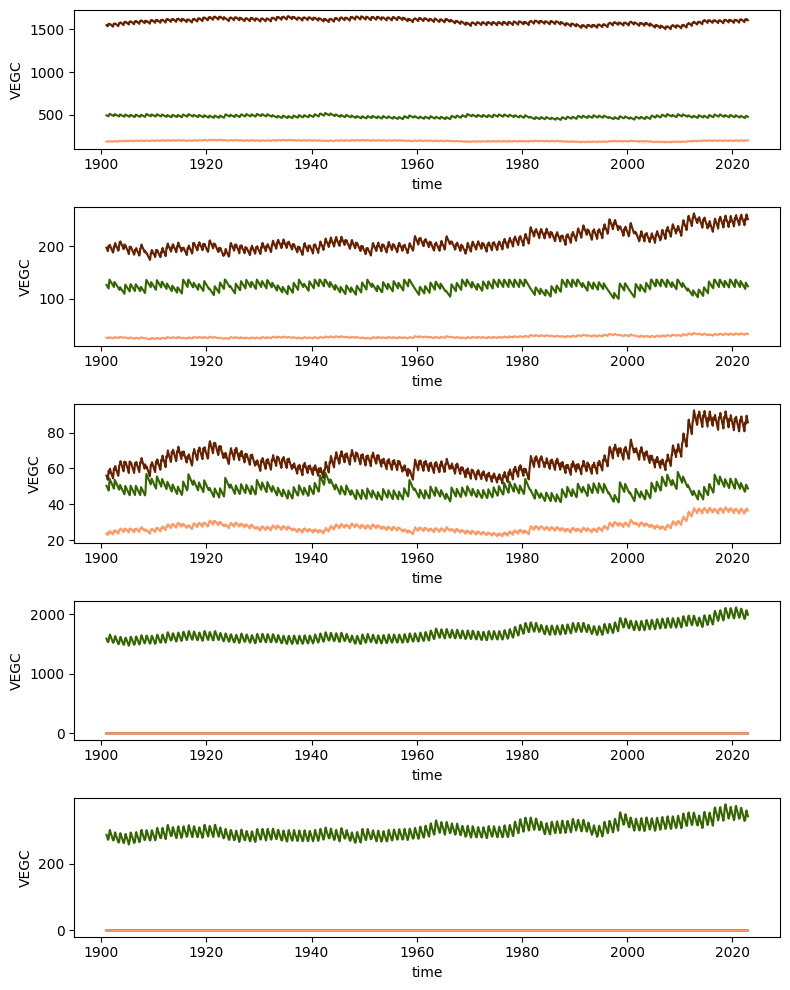

In [22]:
fig, axes = plt.subplots(5,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==0], x='time', y='VEGC', hue='pftpart', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[(vegc_bs_tr['pft']==1)], x='time', y='VEGC', hue='pftpart', ax=axes[1], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==2], x='time', y='VEGC', hue='pftpart', ax=axes[2], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==3], x='time', y='VEGC', hue='pftpart', ax=axes[3], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==4], x='time', y='VEGC', hue='pftpart', ax=axes[4], legend=False, palette=palette)
fig.tight_layout()

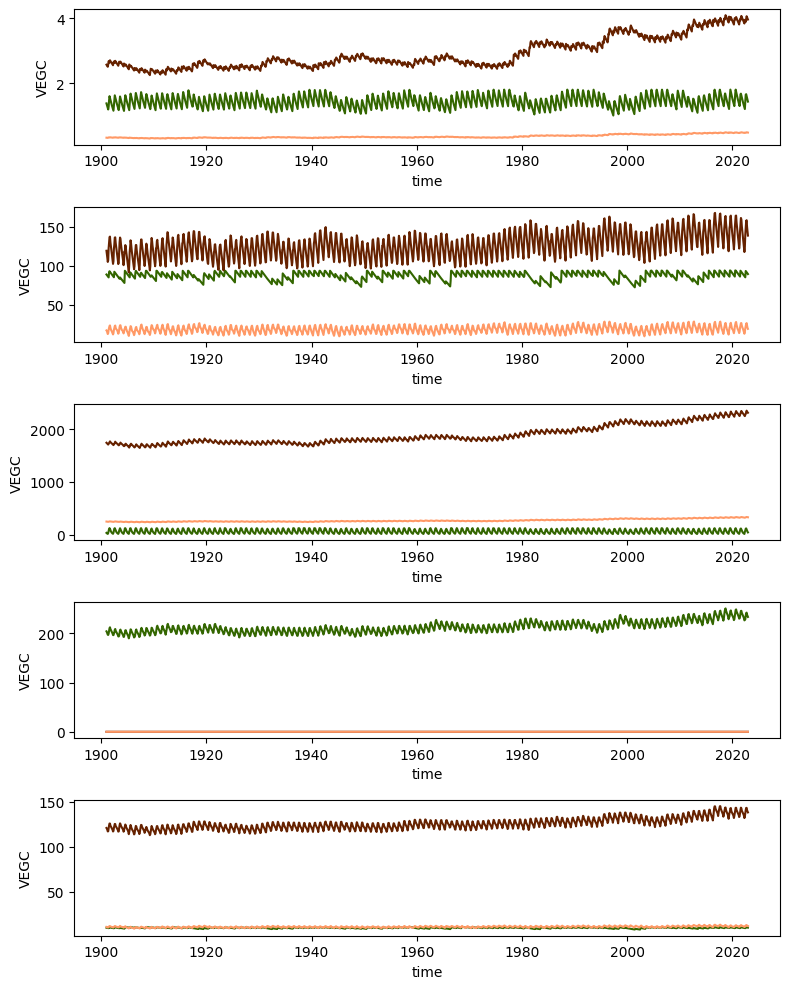

In [23]:
fig, axes = plt.subplots(5,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==0], x='time', y='VEGC', hue='pftpart', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[(vegc_br_tr['pft']==1)], x='time', y='VEGC', hue='pftpart', ax=axes[1], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==2], x='time', y='VEGC', hue='pftpart', ax=axes[2], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==3], x='time', y='VEGC', hue='pftpart', ax=axes[3], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==4], x='time', y='VEGC', hue='pftpart', ax=axes[4], legend=False, palette=palette)
fig.tight_layout()

/tmp/ipykernel_1794/272166968.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_bs_tr, x='date', y='BURN', ax=axes[0], legend=False, palette=palette)
/tmp/ipykernel_1794/272166968.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_br_tr, x='date', y='BURN', ax=axes[1], legend=False, palette=palette)


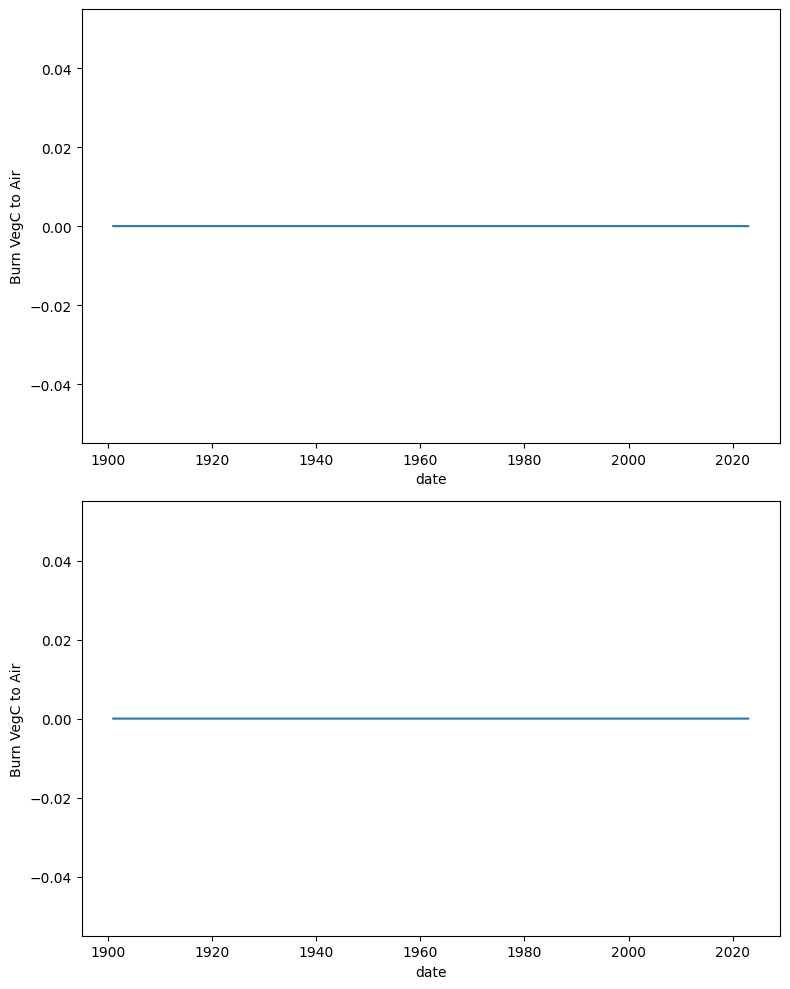

In [24]:
fig, axes = plt.subplots(2,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=df_bs_tr, x='date', y='BURN', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=df_br_tr, x='date', y='BURN', ax=axes[1], legend=False, palette=palette)

axes[0].set_ylabel('Burn VegC to Air')
axes[1].set_ylabel('Burn VegC to Air')

fig.tight_layout()

## Compare soil carbon stocks

In [25]:
shlwc_bs_eq

,time,y,x,SHLWC
0,0,0,0,2806.972174
1,1,0,0,2845.443115
2,2,0,0,2883.521725
3,3,0,0,2921.166849
4,4,0,0,2931.219639
...,...,...,...,...
17995,17995,0,0,3491.847176
17996,17996,0,0,3481.464567
17997,17997,0,0,3514.606878
17998,17998,0,0,3547.383362


<AxesSubplot:xlabel='time', ylabel='DEEPC'>

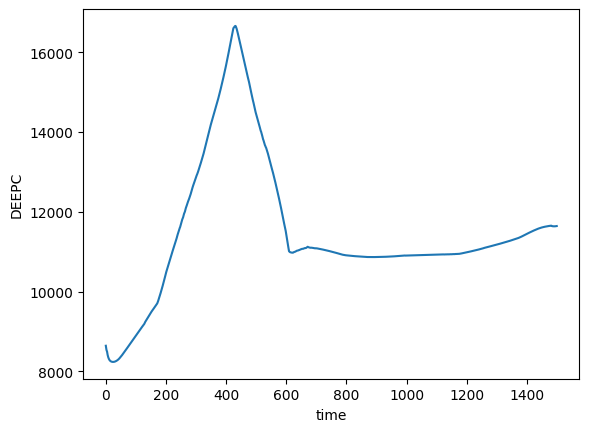

In [26]:
sns.lineplot(data=deepc_bs_eq, x='time', y='DEEPC')

<AxesSubplot:xlabel='time', ylabel='MINEC'>

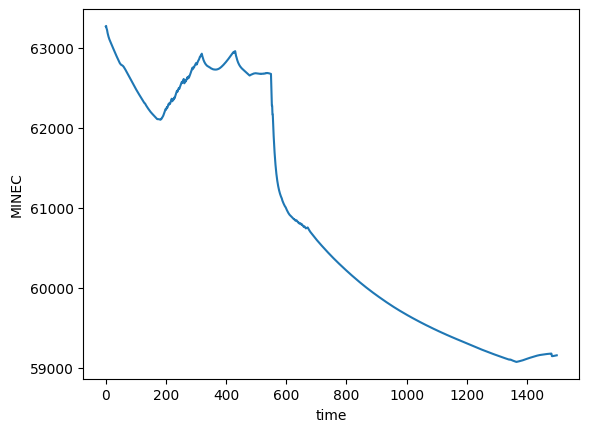

In [27]:
sns.lineplot(data=minec_bs_eq, x='time', y='MINEC')

<AxesSubplot:xlabel='time', ylabel='ALD'>

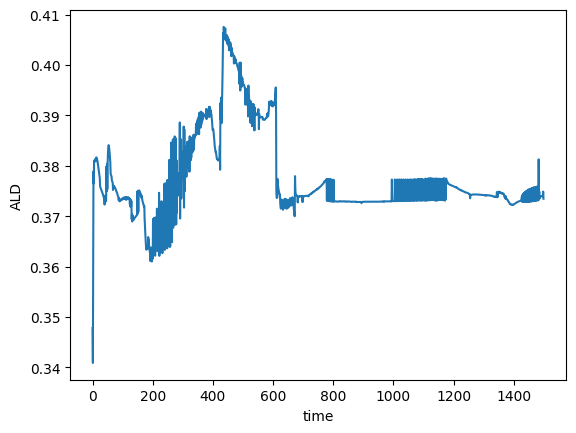

In [28]:
sns.lineplot(data=ald_bs_eq, x='time', y='ALD')

<AxesSubplot:xlabel='year', ylabel='ALD'>

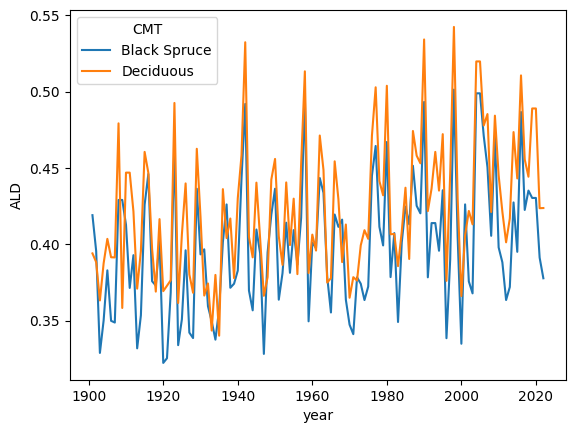

In [29]:
sns.lineplot(data=df_yearly, x='year', y='ALD', hue='CMT')

In [30]:
ald_bs_tr

<xarray.Variable (time: 122)>
array([0.41910899, 0.39556778, 0.328826  , 0.35009281, 0.38294331,
       0.34987114, 0.34874179, 0.42907741, 0.42907741, 0.41284888,
       0.3714327 , 0.39289738, 0.33183285, 0.35350812, 0.42596761,
       0.44608497, 0.3758337 , 0.3729972 , 0.40271031, 0.3222772 ,
       0.32534743, 0.3683318 , 0.46576247, 0.33391943, 0.35085801,
       0.39608325, 0.34214083, 0.33857153, 0.43646479, 0.39340964,
       0.39672764, 0.35940396, 0.34950501, 0.33753537, 0.35772511,
       0.40152224, 0.42613942, 0.37152797, 0.37418797, 0.38278392,
       0.44317039, 0.49201368, 0.36968878, 0.35674538, 0.40970109,
       0.39405484, 0.32818558, 0.39468668, 0.41946605, 0.43643295,
       0.36371866, 0.38106868, 0.41417443, 0.38133118, 0.40932343,
       0.38669772, 0.417372  , 0.49735916, 0.34953753, 0.40112621,
       0.39758336, 0.44343099, 0.43374519, 0.3786301 , 0.35533162,
       0.41953041, 0.411455  , 0.41621209, 0.36371939, 0.3473179 ,
       0.34113263, 0.37837996, 0.37417985, 0.36347411, 0.37232056,
       0.4449768 , 0.46446743, 0.41148959, 0.39927479, 0.46704841,
       0.37852176, 0.40736299, 0.34909792, 0.4012055 , 0.42471128,
       0.41310967, 0.45148551, 0.42525307, 0.42031079, 0.49331116,
       0.3783705 , 0.41392662, 0.41392662, 0.39578754, 0.4354276 ,
       0.33848222, 0.3900486 , 0.50139207, 0.4048826 , 0.33485046,
       0.42617293, 0.37568097, 0.36787215, 0.49895814, 0.49895814,
       0.47107578, 0.45049411, 0.4055785 , 0.4713454 , 0.39796272,
       0.38823108, 0.36349231, 0.372038  , 0.42745564, 0.39508418,
       0.48671493, 0.42254122, 0.43520845, 0.43039424, 0.43039424,
       0.39129036, 0.37775447])
Attributes:
    units:      m
    long_name:  Soil active layer depth

In [31]:
#shlwc_bs_modeled = shlwc_bs_eq.loc[shlwc_bs_eq['time']==999]['SHLWC'].values[0]
#deepc_bs_modeled = deepc_bs_eq.loc[deepc_bs_eq['time']==999]['DEEPC'].values[0]
#shlwc_br_modeled = shlwc_br_eq.loc[shlwc_br_eq['time']==999]['SHLWC'].values[0]
#deepc_br_modeled = deepc_br_eq.loc[deepc_br_eq['time']==999]['DEEPC'].values[0]

shlwc_bs_modeled = shlwc_bs_eq.loc[shlwc_bs_eq['time']==999]['SHLWC'].values[0]
deepc_bs_modeled = deepc_bs_eq.loc[deepc_bs_eq['time']==999]['DEEPC'].values[0]
shlwc_br_modeled = shlwc_br_eq.loc[shlwc_br_eq['time']==999]['SHLWC'].values[0]
deepc_br_modeled = deepc_br_eq.loc[deepc_br_eq['time']==999]['DEEPC'].values[0]

shlwc_bs_field = 2768
deepc_bs_field = 8765
shlwc_br_field = 728
deepc_br_field = 2307

In [32]:
df_org_c = pd.DataFrame({'stand': ['Black Spruce', 'Black Spruce', 'Deciduous', 'Deciduous',
                                   'Black Spruce', 'Black Spruce', 'Deciduous', 'Deciduous'],
                         'carbon_stock': ['Fibric', 'Humic', 'Fibric', 'Humic',
                                          'Fibric', 'Humic', 'Fibric', 'Humic'], 
                         'value': [shlwc_bs_field, deepc_bs_field, shlwc_br_field, deepc_br_field,
                                   shlwc_bs_modeled, deepc_bs_modeled, shlwc_br_modeled, deepc_br_modeled], 
                         'type': ['Field Obs.', 'Field Obs.', 'Field Obs.', 'Field Obs.',
                                  'Modeled (TEM)', 'Modeled (TEM)', 'Modeled (TEM)', 'Modeled (TEM)']})

/tmp/ipykernel_1794/4016085819.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
/tmp/ipykernel_1794/4016085819.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)


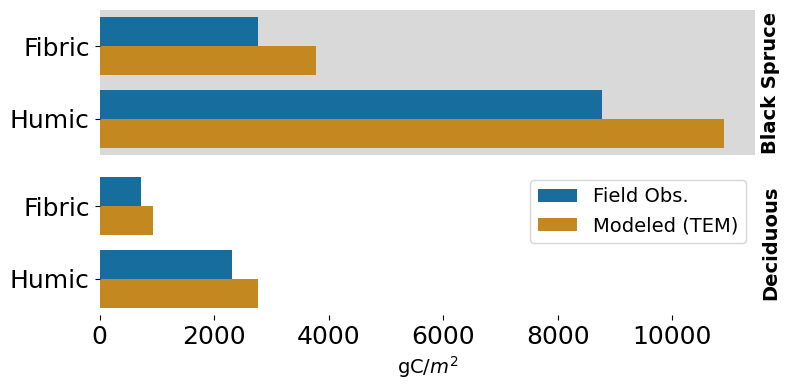

In [33]:
fig, axes = plt.subplots(2, 1, figsize = (8,4), sharex=True)

sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Black Spruce'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[0])
sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Deciduous'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[1])

axes[0].set_facecolor('#d9d9d9')
axes[0].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks_position('none')
axes[0].set_ylabel('Black Spruce', fontweight='bold', fontsize=14)
axes[0].yaxis.set_label_position('right')
axes[0].get_legend().remove()

axes[1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[1].set_ylabel('Deciduous', fontweight='bold', fontsize=14)
axes[1].yaxis.set_label_position('right')
plt.xticks(fontsize= 18)
axes[1].set_xlabel('gC/$m^2$', fontsize=14)
plt.legend(title='', fontsize=14)
sns.despine(left=True, bottom=True)
fig.tight_layout()
plt.savefig('output_figs/BONA/equillibrium_soilC.jpg', dpi=300)

# Combined soil

/tmp/ipykernel_1794/3513874610.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
/tmp/ipykernel_1794/3513874610.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
/tmp/ipykernel_1794/3513874610.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
/tmp/ipykernel_1794/3513874610.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)


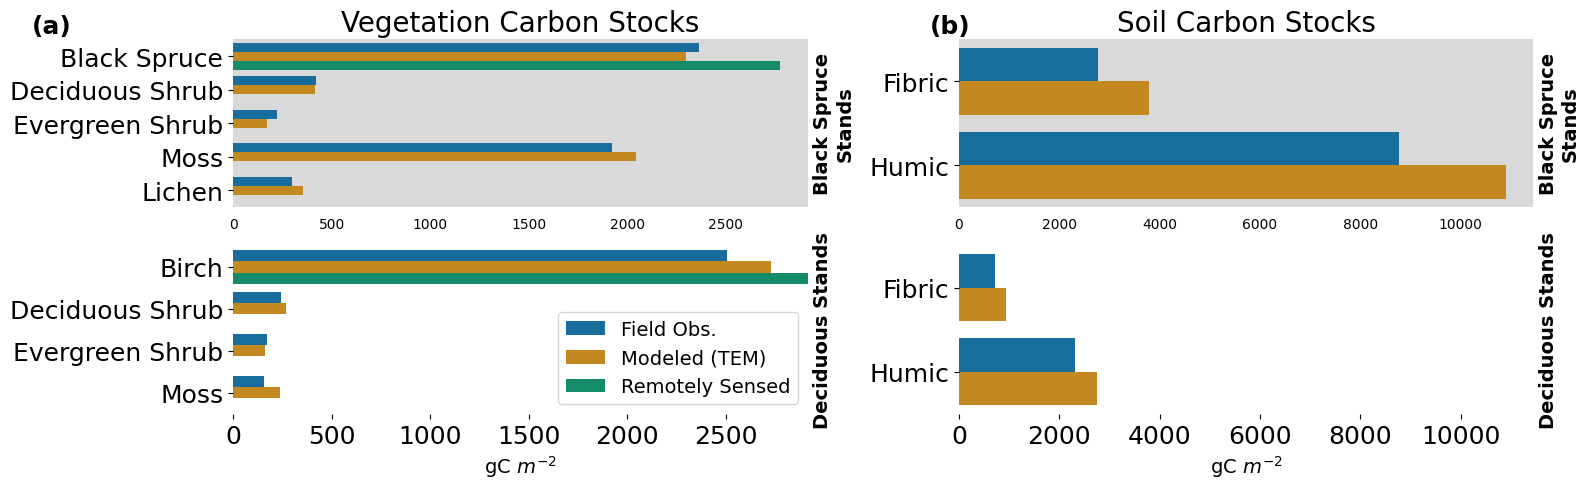

In [34]:
#TODO: propagate Error
fig, axes = plt.subplots(2, 2, figsize = (16,5))
sns.barplot(data = vegc_bs_comp, x='VEGC', y='pft', hue='type', orient='h', ax=axes[0,0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[0,0].set_facecolor('#d9d9d9')
axes[0,0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,0].xaxis.set_ticks_position('none')
axes[0,0].set_ylabel('Black Spruce\nStands', fontweight='bold', fontsize=14)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].get_legend().remove()
axes[0,0].set_title('Vegetation Carbon Stocks', fontsize=20)
axes[0,0].text(-.35, 1.15, '(a)', horizontalalignment='left', verticalalignment='top', transform=axes[0,0].transAxes, fontsize=18, fontweight='bold')

#TODO: propagate Error
sns.barplot(data = vegc_br_comp.loc[vegc_br_comp['pft']!=0], x='VEGC', y='order', hue='type', orient='h', ax=axes[1,0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[1,0].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_ylabel('Deciduous Stands', fontweight='bold', fontsize=14)
axes[1,0].yaxis.set_label_position('right')
axes[1,0].set_xlabel('gC $m^{-2}$', fontsize=14)
axes[1,0].legend(title='', fontsize=14)
axes[1,0].sharex(axes[0,0])



sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Black Spruce'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[0,1])
sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Deciduous'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[1,1])

axes[0,1].set_title('Soil Carbon Stocks', fontsize=20)
axes[0,1].set_facecolor('#d9d9d9')
axes[0,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[0,1].set_xlabel('')
axes[0,1].xaxis.set_ticks_position('none')
axes[0,1].set_ylabel('Black Spruce\nStands', fontweight='bold', fontsize=14)
axes[0,1].yaxis.set_label_position('right')
axes[0,1].get_legend().remove()
axes[0,1].text(-.05, 1.15, '(b)', horizontalalignment='left', verticalalignment='top', transform=axes[0,1].transAxes, fontsize=18, fontweight='bold')

axes[1,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[1,1].set_ylabel('Deciduous Stands', fontweight='bold', fontsize=14)
axes[1,1].yaxis.set_label_position('right')
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('gC $m^{-2}$', fontsize=14)
axes[1,1].get_legend().remove()
sns.despine(left=True, bottom=True)
axes[1,1].sharex(axes[0,1])

fig.tight_layout()
plt.savefig('output_figs/BONA/C_stocks_combined.jpg', dpi=300)


# Fluxes

In [35]:
BONA_EC_monthly = pd.read_csv('/data/comparison_data/BONA_monthly_fluxes.csv', parse_dates=['MM_YY'])


In [36]:
decid_color = '#6CB36B'
ever_color = '#1F6B39'

In [37]:
df_br

,date,GPP,NPP,RG,RG_root,RH,RM,RM_root,LWC_top,TLAYER_top,EET,TRANSPIRATION,LAI,BURN,RECO,NEE,year
0,1901-01-01,0.000000,-0.618562,0.000000,0.000000,3.555212,0.618562,0.255268,0.000000,-11.483969,0.429480,0.000000,6.492292,0.0,4.173774,4.173774,1901
1,1901-02-01,0.000000,-1.128949,0.000000,0.000000,4.486027,1.128949,0.457571,0.000000,-11.652877,0.606783,0.000000,6.249530,0.0,5.614976,5.614976,1901
2,1901-03-01,0.000000,-5.169535,0.000000,0.000000,5.623360,5.169535,1.844750,0.000000,-9.917235,3.204962,0.000000,6.050705,0.0,10.792895,10.792895,1901
3,1901-04-01,0.000000,-10.879490,0.000000,0.000000,7.201231,10.879490,2.136608,0.000000,-7.424956,28.758317,0.000000,5.875486,0.0,18.080720,18.080720,1901
4,1901-05-01,63.726625,36.001534,3.960169,0.181617,12.518044,23.764922,3.152184,0.120917,-0.106589,30.875259,0.234576,5.704118,0.0,40.243135,-23.483490,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2022-08-31,173.038419,112.740941,12.401504,1.079263,0.002204,47.895963,5.798349,0.260142,7.838972,35.775443,21.843014,8.571275,0.0,60.299672,-112.738747,2022
1460,2022-10-01,106.893186,63.716395,7.008803,0.790852,11.189631,36.167990,5.363623,0.273893,4.515791,17.770560,8.652238,8.818906,0.0,54.366424,-52.526762,2022
1461,2022-10-31,0.000000,-19.049841,0.000000,0.000000,15.142160,19.049841,3.855940,0.212278,-0.213941,1.409262,0.742541,8.429878,0.0,34.192000,34.192000,2022
1462,2022-12-01,0.000000,-6.651132,0.000000,0.000000,7.197161,6.651132,2.570188,0.000000,-3.637115,0.571568,0.000000,7.901139,0.0,13.848293,13.848293,2022


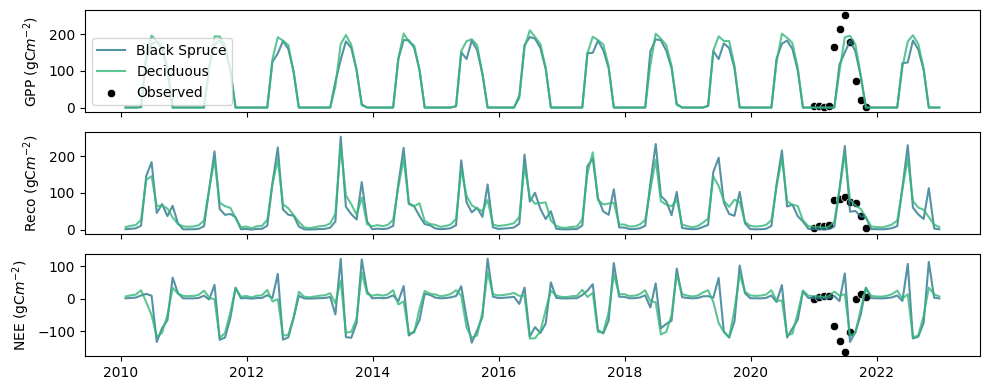

In [38]:
fig, axes=plt.subplots(3,1,figsize=(10,4), sharex=True)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='GPP', label = 'Black Spruce', ax=axes[0], alpha=0.8, color='#2A788EFF')
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='RECO', label = 'Black Spruce', ax=axes[1], legend=False, alpha=0.8, color='#2A788EFF')
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='NEE', label = 'Black Spruce', ax=axes[2], legend=False, alpha=0.8, color='#2A788EFF')

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='GPP', label = 'Deciduous', ax=axes[0], alpha=0.8, color='#35B779FF')
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='RECO', label = 'Deciduous', ax=axes[1], legend=False, alpha=0.8, color='#35B779FF')
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='NEE', label = 'Deciduous', ax=axes[2], legend=False, alpha=0.8, color='#35B779FF')

sns.scatterplot(data=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021], x='MM_YY', y='GPP_gCm-2', ax=axes[0], label='Observed', color='black')
sns.scatterplot( x=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021,'MM_YY'], y=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021, 'GPP_gCm-2'] + BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021, 'NEE_gCm-2'], ax=axes[1], legend=False, color='black')
sns.scatterplot(data=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021], x='MM_YY', y='NEE_gCm-2', ax=axes[2], legend=False, color='black')
plt.xlabel('')

axes[0].set_ylabel('GPP (gC$m^{-2}$)')
axes[1].set_ylabel('Reco (gC$m^{-2}$)')
axes[2].set_ylabel('NEE (gC$m^{-2}$)')
fig.tight_layout()
plt.savefig('output_figs/BONA/flux_hist.jpg', dpi=300)

In [39]:
BONA_soil_flux = pd.read_csv('/data/comparison_data/BONA_daily_averaged_soil_flux.csv', parse_dates=['MM_YY', 'Date'])

In [40]:
BONA_soil_flux.head()

,Unnamed: 0,Date,stand,Flux (gC m2 s-1),Flux (gC m2 m-1),month,year,MM_YY
0,0,2021-05-21,black_spruce,0.000025,66.273065,5,2021,2021-05-01
1,1,2021-05-21,deciduous,0.000028,74.698665,5,2021,2021-05-01
2,2,2021-05-21,mixed,0.000015,40.095081,5,2021,2021-05-01
3,3,2021-05-27,black_spruce,0.000021,55.853433,5,2021,2021-05-01
4,4,2021-05-27,deciduous,0.000019,50.025484,5,2021,2021-05-01


<AxesSubplot:xlabel='date', ylabel='None'>

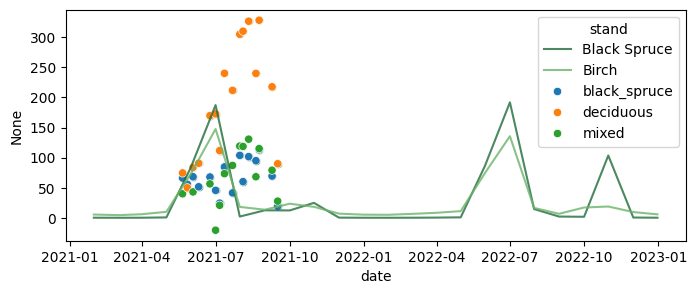

In [41]:
fig, axes=plt.subplots(figsize=(8,3))
bs_soil_resp = df_bs.loc[(df_bs['date']>'2021-01-01') & (df_bs['date']<'2023-01-01')]
br_soil_resp = df_br.loc[(df_br['date']>'2021-01-01') & (df_br['date']<'2023-01-01')]
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH']+bs_soil_resp['RM_root']+bs_soil_resp['RG_root'], label = 'Black Spruce', legend=False, alpha=0.8, color=ever_color)
sns.lineplot(data=br_soil_resp, x='date', y=br_soil_resp['RH']+br_soil_resp['RM_root']+br_soil_resp['RG_root'], label = 'Birch', legend=False, alpha=0.8, color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='black_spruce')], x='Date', y='Flux (gC m2 m-1)', color=ever_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='deciduous')], x='Date', y='Flux (gC m2 m-1)', color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[BONA_soil_flux['year']==2021], x='Date', y='Flux (gC m2 m-1)', hue='stand')

<AxesSubplot:xlabel='date', ylabel='RH'>

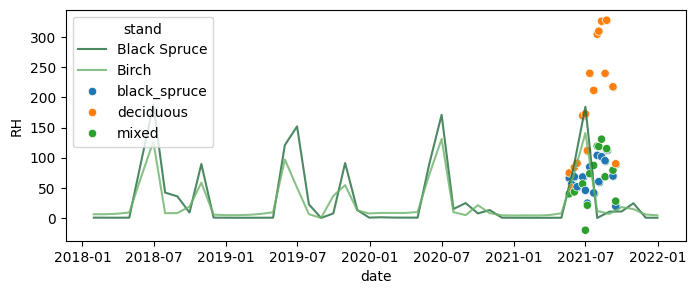

In [42]:
fig, axes=plt.subplots(figsize=(8,3))
bs_soil_resp = df_bs.loc[(df_bs['date']>'2018-01-01') & (df_bs['date']<'2022-01-01')]
br_soil_resp = df_br.loc[(df_br['date']>'2018-01-01') & (df_br['date']<'2022-01-01')]
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'Black Spruce', legend=False, alpha=0.8, color=ever_color)
sns.lineplot(data=br_soil_resp, x='date', y=br_soil_resp['RH'], label = 'Birch', legend=False, alpha=0.8, color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='black_spruce')], x='Date', y='Flux (gC m2 m-1)', color=ever_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='deciduous')], x='Date', y='Flux (gC m2 m-1)', color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[BONA_soil_flux['year']==2021], x='Date', y='Flux (gC m2 m-1)', hue='stand')

In [43]:
rh_br_tr_layer

<xarray.Variable (time: 1464, layer: 22)>
array([[0.        , 2.70427725, 0.11729573, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.64857695, 0.11868884, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 4.69791048, 0.13443157, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 6.54822478, 0.29364813, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.36155023, 0.24230748, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.93684745, 0.16410514, ..., 0.        , 0.        ,
        0.        ]])
Attributes:
    units:      g/m2/month
    long_name:  Heterotrophic respiration

<AxesSubplot:xlabel='date', ylabel='TLAYER_top'>

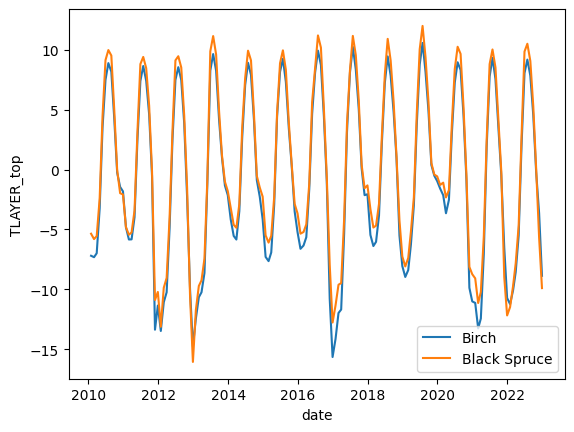

In [44]:
fig, ax = plt.subplots()

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='TLAYER_top', label = 'Birch', ax=ax)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='date', y='TLAYER_top', label = 'Black Spruce', ax=ax)


<AxesSubplot:xlabel='date', ylabel='LWC_top'>

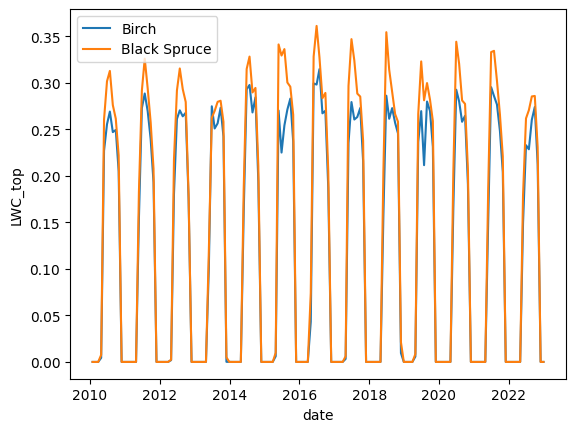

In [45]:
fig, ax = plt.subplots()

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='LWC_top', label = 'Birch', ax=ax)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='date', y='LWC_top', label = 'Black Spruce', ax=ax)


In [46]:
tlayer_bs_tr_df = pd.DataFrame(tlayer_bs_tr)
lwclayer_bs_tr_df = pd.DataFrame(lwclayer_bs_tr)

<AxesSubplot:xlabel='None', ylabel='1'>

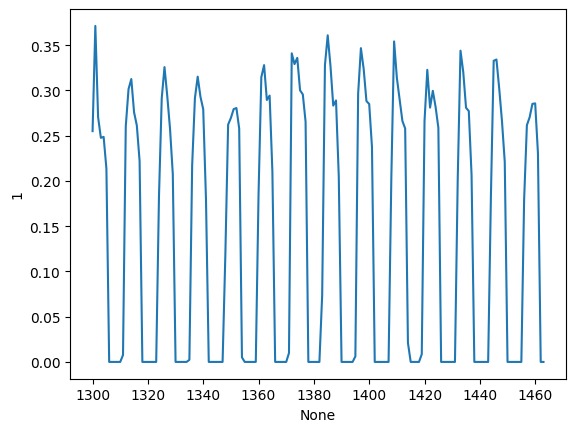

In [47]:
sns.lineplot(x=lwclayer_bs_tr_df[1300:].index, y=lwclayer_bs_tr_df[1300:][1])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][1])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][2])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][3])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][4])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][5])

<AxesSubplot:xlabel='None', ylabel='0'>

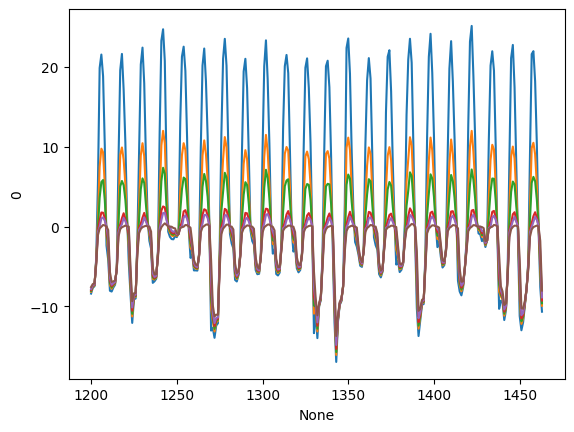

In [48]:

sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][0])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][1])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][2])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][3])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][4])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][5])

In [49]:
bs_soil_resp

,date,GPP,NPP,RG,RG_root,RH,RM,RM_root,LWC_top,TLAYER_top,EET,TRANSPIRATION,LAI,BURN,RECO,NEE,year
1404,2018-01-30,0.000000,-1.051918,0.000000,0.000000e+00,0.533274,1.051918,0.069191,0.000000,-3.299566,3.063839,0.000000,72.740194,0.0,1.585192,1.585192,2018
1405,2018-03-02,0.000000,-1.505134,0.000000,0.000000e+00,0.457796,1.505134,0.099192,0.000000,-4.841548,0.150124,0.000000,71.857025,0.0,1.962930,1.962930,2018
1406,2018-03-30,0.000000,-3.670594,0.000000,0.000000e+00,0.448209,3.670594,0.242379,0.000000,-4.686249,4.223968,0.000000,70.976233,0.0,4.118802,4.118802,2018
1407,2018-04-30,0.000000,-10.220989,0.000000,0.000000e+00,0.484759,10.220989,0.676404,0.000000,-2.868620,17.479925,3.140002,70.066637,0.0,10.705748,10.705748,2018
1408,2018-05-30,153.163381,119.731398,13.170454,1.115611e+00,92.993025,20.261531,1.351285,0.203528,2.823732,34.271695,25.811581,69.049349,0.0,126.425011,-26.738370,2018
1409,2018-06-30,185.744255,140.154519,15.416997,7.133877e-01,187.498343,30.172747,2.020136,0.354232,7.952166,55.934430,38.082435,70.216273,0.0,233.088087,47.343831,2018
1410,2018-07-30,183.124138,133.117737,14.642951,7.275593e-03,42.067065,35.363455,2.338719,0.313859,10.915738,70.858636,55.453480,72.446293,0.0,92.073471,-91.050667,2018
1411,2018-08-30,154.879755,113.064115,12.437054,2.808065e-01,35.838373,29.378577,1.914200,0.290454,9.101655,49.031144,27.956637,74.812549,0.0,77.654003,-77.225752,2018
1412,2018-09-30,107.175692,76.563453,8.421980,5.417850e-01,8.986823,22.190259,1.443752,0.266268,5.661686,24.216939,13.778451,76.516326,0.0,39.599062,-67.576630,2018
1413,2018-10-30,9.912291,-3.686121,0.280813,2.423569e-02,89.505830,13.317601,0.869485,0.257992,1.122332,6.105241,2.387871,77.105352,0.0,103.104243,93.191951,2018


<AxesSubplot:xlabel='date', ylabel='LWC_top'>

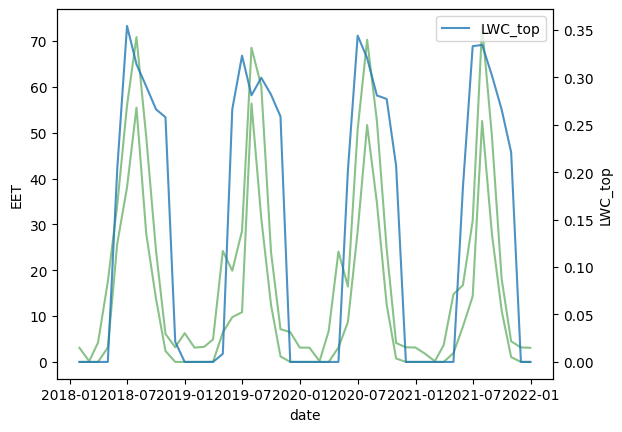

In [50]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['EET'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['TRANSPIRATION'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['LWC_top'], label = 'LWC_top', alpha=0.8, ax = ax2)

<AxesSubplot:xlabel='date', ylabel='LAI'>

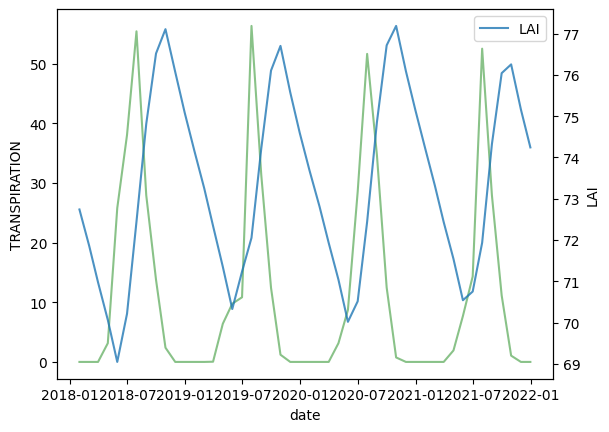

In [51]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['TRANSPIRATION'], label = 'Trans', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['LAI'], label = 'LAI', alpha=0.8, ax = ax2)

<AxesSubplot:xlabel='date', ylabel='LAI'>

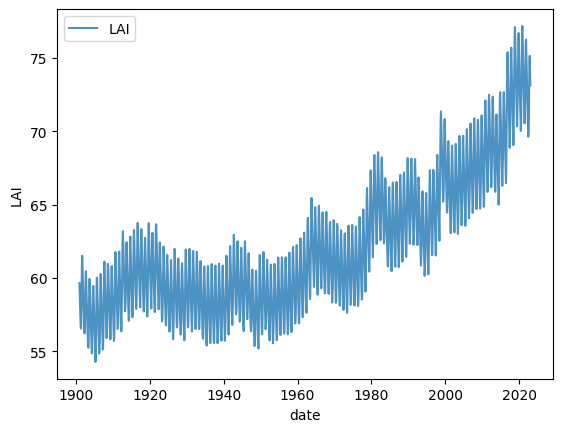

In [52]:
sns.lineplot(data=df_bs, x='date', y=df_bs['LAI'], label = 'LAI', alpha=0.8)

<AxesSubplot:>

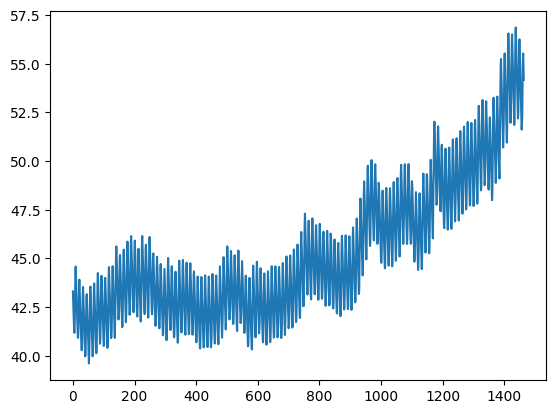

In [53]:
sns.lineplot(x=np.arange(len(lai_bs_tr)), y=lai_bs_tr[:,3])

(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

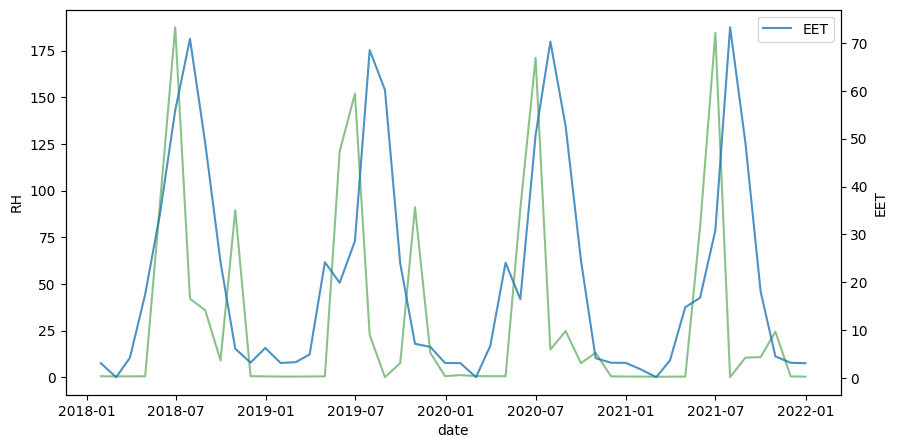

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['EET'], label = 'EET', alpha=0.8, ax = ax2)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='time', ylabel='LTRFALC'>

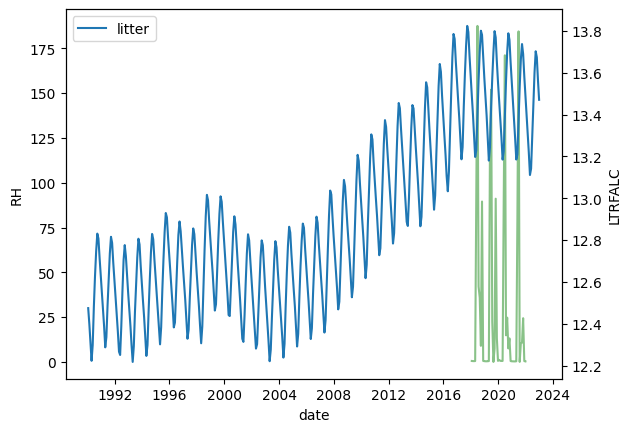

In [55]:

fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=ltrfalc_bs_tr.loc[ltrfalc_bs_tr['time']>'1990-01-01'], x='time', y='LTRFALC', ax=ax2, label='litter')

<AxesSubplot:xlabel='time', ylabel='SHLWC'>

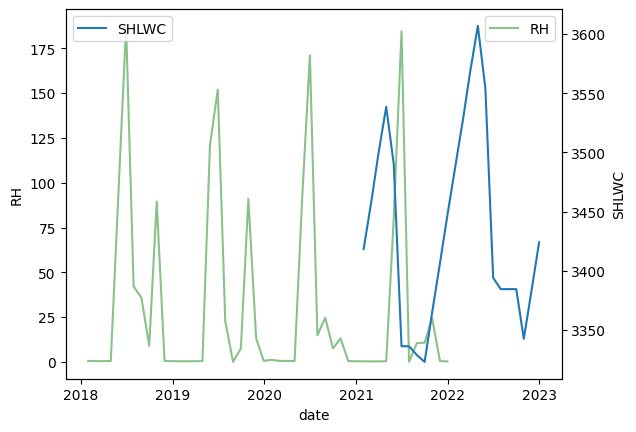

In [56]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=shlwc_bs_tr.loc[shlwc_bs_tr['time']>'2021-01-01'], x='time', y='SHLWC', ax=ax2, label='SHLWC')

In [ ]:
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='RH')
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='RH', hue = 'LWC_top')

<AxesSubplot:xlabel='date', ylabel='RH'>

In [ ]:
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='LWC_top', y='RH', label = 'Birch', hue='TLAYER_top')

In [ ]:
sns.scatterplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='TLAYER_top', y='RH', label = 'Birch', hue='LWC_top')

In [ ]:
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='LWC_top', y='RH', label = 'Birch', color='#708891')

In [ ]:
df_yearly_melt = df_yearly[['year', 'GPP', 'RECO', 'NEE', 'CMT']].melt(id_vars=['year', 'CMT'], value_vars=['GPP', 'RECO', 'NEE', 'CMT'])
df_yearly_melt.loc[df_yearly_melt['variable']=='RECO', 'variable'] = 'Reco'
df_yearly_melt['order'] = 0
df_yearly_melt.loc[df_yearly_melt['variable']=='Reco', 'order'] = 1
df_yearly_melt.loc[df_yearly_melt['variable']=='NEE', 'order'] = 2
df_yearly_melt = df_yearly_melt.sort_values(by='order')

In [ ]:
df_yearly_melt.head()

In [ ]:
pal = sns.color_palette(['#35B779FF', '#2A788EFF'])

fig, ax = plt.subplots()
sns.boxplot(data = df_yearly_melt.loc[df_yearly_melt['year']>=2010], x='variable', y='value', hue='CMT', palette = pal)

ax.set_ylabel('Flux (gC$m^{-2}$$y^{-1}$)', fontsize=18)
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(title='', fontsize=14, frameon=False)
fig.tight_layout()
plt.savefig('output_figs/BONA/flux_boxplot.jpg', dpi=300)

In [ ]:
df_yearly_melt.groupby(by=['CMT', 'variable']).mean()

In [ ]:
df_yearly_melt.groupby(by=['CMT', 'variable']).std()

In [ ]:
#sns.set_palette(sns.color_palette("Greys",2))
fig, axes=plt.subplots(3,1,figsize=(8,5))
sns.lineplot(data=df_bs_yearly, x='year', y='GPP', ax=axes[0], label = 'Black Spruce', color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='GPP', ax=axes[0], label = 'Deciduous', color=decid_color)
sns.lineplot(data=df_bs_yearly, x='year', y='RECO', ax=axes[1], color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='RECO', ax=axes[1], color=decid_color)
sns.lineplot(data=df_bs_yearly, x='year', y='NEE', ax=axes[2], color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='NEE', ax=axes[2], color=decid_color)

axes[0].xaxis.set_tick_params(labelbottom=False)
axes[1].xaxis.set_tick_params(labelbottom=False)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('GPP\n(g C $m^{-2}$ $y^{-1}$)')
axes[1].set_ylabel('RECO\n(g C $m^{-2}$ $y^{-1}$)')
axes[2].set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
plt.xlabel('')
fig.tight_layout()
plt.savefig('output_figs/BONA/yearly_fluxes.jpg', dpi=300)


In [ ]:
df_yearly.columns

In [ ]:
sns.lineplot(data=df_yearly, x='year', y='ALD', hue='CMT')
#plt.ylim(0,1)

In [ ]:
bins=['2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', 
      '2050-2059', '2060-2069', '2070-2079', '2080-2089', '2090-2100']
df_bs_recent=df_bs_yearly.loc[df_bs_yearly.index>=2000]
df_br_recent=df_br_yearly.loc[df_br_yearly.index>=2000]

df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()

df_bs_recent.loc[df_bs_recent.index==2100, 'bin_index']=9
df_br_recent.loc[df_bs_recent.index==2100, 'bin_index']=9

In [ ]:
df_bs_recent['stand'] = 'Black Spruce'
df_br_recent['stand'] = 'Birch'
df_recent=pd.concat([df_bs_recent, df_br_recent])

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

In [ ]:
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='RH')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='RH')

In [ ]:
a = 'sdaf/adfadsfa/asdfa/fs.tif'
b = '/'.join(a.split('/')[:-1]) + '/fused_landcover.tif'
b

In [ ]:
df_bs[['date', 'GPP', 'NPP', 'RH', 'RECO', 'NEE']].to_csv('BONA_Black_Spruce_flux_hist.csv')

In [ ]:
df_br[['date', 'GPP', 'NPP', 'RH', 'RECO', 'NEE']].to_csv('BONA_Birch_flux_hist.csv')